In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from plotly.offline import iplot

In [2]:
cvconfirmed = pd.read_csv('https://raw.githubusercontent.com/CarmineCrown/COVID-19/master/covid_19_datasets/covid_19_globaldata/time_series_covid19_confirmed_global.csv')
cvdeath = pd.read_csv('https://raw.githubusercontent.com/CarmineCrown/COVID-19/master/covid_19_datasets/covid_19_globaldata/time_series_covid19_deaths_global.csv')
cvrecovered = pd.read_csv('https://raw.githubusercontent.com/CarmineCrown/COVID-19/master/covid_19_datasets/covid_19_globaldata/time_series_covid19_recovered_global.csv')
cvcountry = pd.read_csv('https://raw.githubusercontent.com/CarmineCrown/COVID-19/master/covid_19_datasets/covid_19_globaldata/times_series_covid19_cases_country.csv')

In [3]:
cvconfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48


In [4]:
cvconfirmed.rename({'Province/State':'State','Country/Region':'Country'}, axis=1, inplace=True)
cvdeath.rename({'Province/State':'State','Country/Region':'Country'}, axis=1, inplace=1)
cvrecovered.rename({'Province/State':'State','Country/Region':'Country'}, axis=1, inplace=1)

In [5]:
cvconfirmed.head(20)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,2782,2884,3029,3175,3313,3392,3538,3718,3860,4044
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3044,3047,3051,3053,3053,3053,3059,3063,3071,3074


In [6]:
cvcountries = cvconfirmed.drop(['State','Lat','Long'], axis = 1)

In [7]:
cvcountries= cvcountries.groupby(by='Country').sum()

In [8]:
cvcountries.head(20)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
Albania,0,0,0,0,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
Algeria,0,0,0,0,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
Andorra,0,0,0,0,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
Angola,0,0,0,0,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
Argentina,0,0,0,0,0,0,0,0,0,0,...,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479
Armenia,0,0,0,0,0,0,0,0,0,0,...,2782,2884,3029,3175,3313,3392,3538,3718,3860,4044
Australia,0,0,0,0,4,5,5,6,9,9,...,6894,6913,6918,6939,6948,6970,6980,6989,7019,7035


In [9]:
cvcountries.iloc[:, -1].sum()

4542347

In [10]:
cvcountries.sort_values(by = cvcountries.columns[-1], ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824
Russia,0,0,0,0,0,0,0,0,0,2,...,165929,177160,187859,198676,209688,221344,232243,242271,252245,262843
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,202359,207977,212629,216525,220449,224332,227741,230985,234440,238004
Spain,0,0,0,0,0,0,0,0,0,0,...,220325,221447,222857,223578,224350,227436,228030,228691,229540,230183
Italy,0,0,0,0,0,0,0,0,0,2,...,214457,215858,217185,218268,219070,219814,221216,222104,223096,223885
Brazil,0,0,0,0,0,0,0,0,0,0,...,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291
France,0,0,2,3,3,3,4,5,5,5,...,174224,174918,176202,176782,177094,177547,178349,178184,178994,179630
Germany,0,0,0,0,0,1,4,4,4,5,...,168162,169430,170588,171324,171879,172576,173171,174098,174478,175233
Turkey,0,0,0,0,0,0,0,0,0,0,...,131744,133721,135569,137115,138657,139771,141475,143114,144749,146457


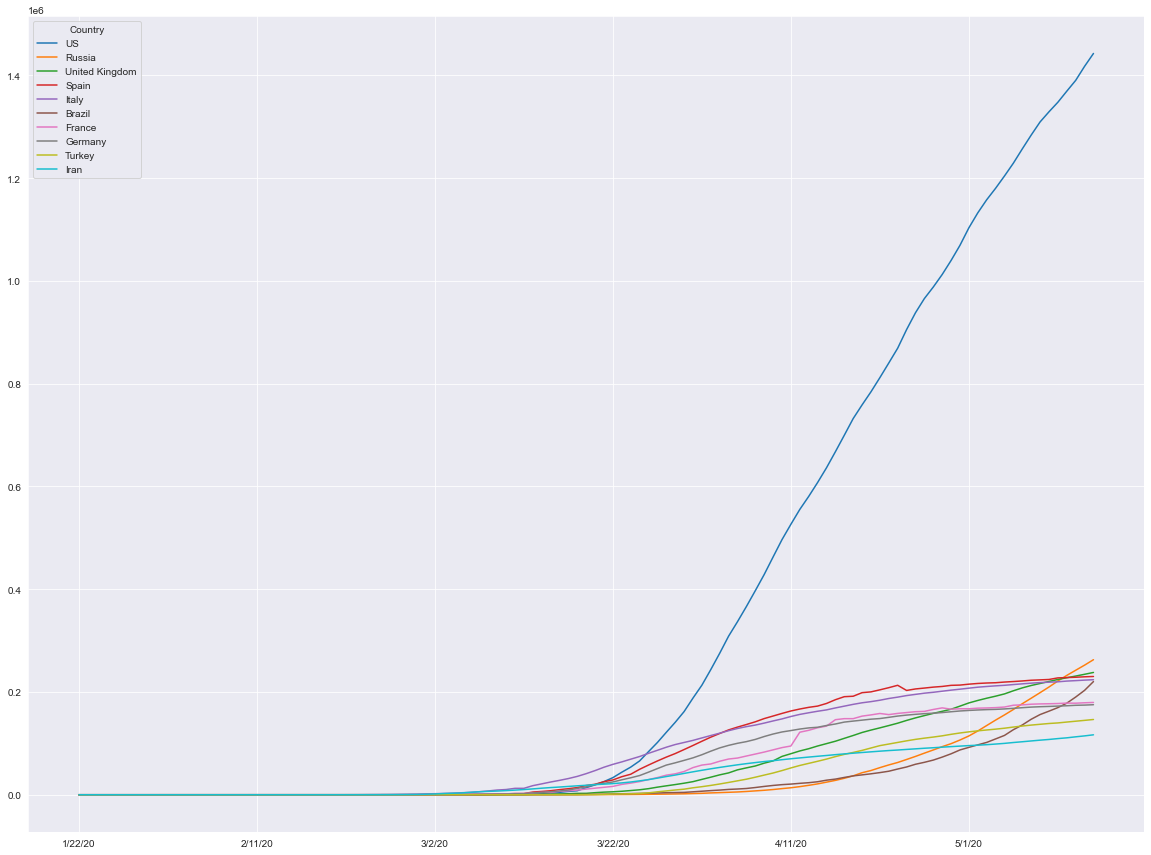

In [11]:
sns.set_style('darkgrid') 
cvcountries.sort_values(by = cvcountries.columns[-1], ascending=False).head(10).transpose().plot(figsize=(20,15))

In [12]:
from plotly.offline import iplot, init_notebook_mode 
## Trasforming df into cufflinks for iPlot 
import cufflinks 
cufflinks.go_offline(connected= True) 
init_notebook_mode(connected= True)

In [13]:
cvcountries.sort_values(by = cvcountries.columns[-1], ascending=False).head(20).transpose().iplot()

In [14]:
cvcountries.loc['India'].transpose().iplot()

In [15]:
cvcountries.loc['India'].transpose().iplot(title = "Time Series Covid19 Confirmed Cases Visulaization for Republic of India")

In [16]:
import folium


In [17]:
# location - [latitude, longitude], 
world_map = folium.Map(location=[10,0], zoom_start=2, max_zoom=8, min_zoom=1, width='100%') 
world_map

In [18]:
# location - [latitude, longitude], 
world_map = folium.Map(location=[10,0], zoom_start=2, max_zoom=8, min_zoom=1, width='100%', tiles = "CartoDB dark_matter") 
for i in range(0, len(cvconfirmed)): 
    folium.Circle(location=[ cvconfirmed.iloc[i]['Lat'], cvconfirmed.iloc[i]['Long']], 
                  radius= 10, color= 'red', fill = True).add_to(world_map)
world_map


In [ ]:
radius= int(np.log(covid_confirmed.iloc[i, -1]+1.00001))*30000,